Import

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("../data/transactions.csv")  
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            199999 non-null  int64  
 1   type            199999 non-null  object 
 2   amount          199999 non-null  float64
 3   nameOrig        199999 non-null  object 
 4   oldbalanceOrg   199999 non-null  float64
 5   newbalanceOrig  199999 non-null  float64
 6   nameDest        199999 non-null  object 
 7   oldbalanceDest  199999 non-null  float64
 8   newbalanceDest  199999 non-null  float64
 9   isFraud         199999 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 15.3+ MB


In [5]:
desc = df.describe()
desc_formateado = desc.applymap(lambda x: f"{x:,.2f}".replace(",", " "))
desc_formateado

C:\Users\Eduar\AppData\Local\Temp\ipykernel_13916\3608215248.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formateado = desc.applymap(lambda x: f"{x:,.2f}".replace(",", " "))


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,199 999.00,199 999.00,199 999.00,199 999.00,199 999.00,199 999.00,199 999.00
mean,243.29,180 242.49,831 436.11,852 333.32,1 093 644.20,1 218 886.29,0.00
std,141.80,625 548.23,2 882 313.99,2 917 352.10,3 302 878.09,3 627 191.60,0.04
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13 387.46,0.00,0.00,0.00,0.00,0.00
50%,238.00,74 266.95,14 201.00,0.00,132 057.24,213 809.81,0.00
75%,334.00,208 637.58,107 848.92,144 962.90,941 029.05,1 109 081.56,0.00
max,741.00,52 042 803.47,50 399 045.08,40 399 045.08,235 932 693.80,311 404 901.40,1.00


# unique Valores

In [6]:
df['step'].unique().shape


(524,)

In [7]:
df['type'].unique()

array(['CASH_OUT', 'CASH_IN', 'PAYMENT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [36]:
df['nameOrig'].shape

(199999,)

In [37]:
df['nameDest'].value_counts

<bound method IndexOpsMixin.value_counts of 0         C1298177219
1         C1323169990
2          C608741097
3          C462716348
4         C1971700992
             ...     
199994     M671547467
199995    C1571552280
199996    C1831159716
199997     C371793088
199998     C194464706
Name: nameDest, Length: 199999, dtype: object>

# Analisis de fraudes

In [10]:
fraudes = df[df['isFraud'] == 1]
regulares = df[df['isFraud'] == 0]
totales = df.shape[0]

In [11]:
print("porcentajes de fraude: ")
print((fraudes.shape[0]/totales)*100)
print("porcentajes de regulares:")
print((regulares.shape[0]/totales)*100)

print("total de fraudes:")
print(fraudes.shape[0])

porcentajes de fraude: 
0.14100070500352502
porcentajes de regulares:
99.85899929499648
total de fraudes:
282


solo un 0.14 % son fraudulentas

In [12]:
fraudes.groupby(['type', 'isFraud']).size()


type      isFraud
CASH_OUT  1          132
TRANSFER  1          150
dtype: int64

los fraudes solo exiten son sacando dinero del sistema y en trasferencias

## entendiendo las transsaciones

In [13]:
cash_out = df[df['type'] == 'CASH_OUT']
cash_in  =  df[df['type'] == 'CASH_IN']
payment  = df[df['type'] == 'PAYMENT']
transfer = df[df['type'] == 'TRANSFER']
debit  = df[df['type'] == 'DEBIT']



In [14]:
cash_out.head()





,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0
9,156,CASH_OUT,180660.51,C106721885,10044.00,0.00,C1944402764,32319.16,212979.67,0


In [15]:
cash_in.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
12,180,CASH_IN,172163.65,C62662075,126185.00,298348.65,C898955098,4697103.49,4524939.85,0
15,403,CASH_IN,103104.65,C1553566264,1105122.03,1208226.68,C1257936364,684880.98,581776.32,0
18,16,CASH_IN,474070.38,C1940404557,120.00,474190.38,C604023654,9035.00,0.00,0
21,179,CASH_IN,399721.00,C108988841,5657749.28,6057470.28,C1608590055,1073650.18,673929.18,0


In [16]:
payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
5,182,PAYMENT,15712.66,C365217190,13981.00,0.00,M1108542644,0.00,0.00,0
6,355,PAYMENT,357.15,C1752574405,283349.71,282992.56,M807801422,0.00,0.00,0
7,302,PAYMENT,19477.23,C1681583142,0.00,0.00,M911688965,0.00,0.00,0
8,35,PAYMENT,56554.20,C643126692,503065.44,446511.24,M1453972991,0.00,0.00,0
11,139,PAYMENT,13409.19,C716300579,322562.56,309153.38,M840764629,0.00,0.00,0


In [17]:
transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
14,48,TRANSFER,72641.28,C1119777637,0.00,0.00,C1186553459,581740.44,654381.72,0
76,34,TRANSFER,652380.14,C647366173,26181.85,0.00,C1756965554,667108.73,1319488.88,0
80,350,TRANSFER,638890.23,C2085409217,0.00,0.00,C807258450,829440.00,1468330.23,0
88,345,TRANSFER,1966939.36,C549213081,0.00,0.00,C437801258,8297777.70,10264717.06,0
109,402,TRANSFER,58108.25,C219128708,22340.00,0.00,C289496053,4374.73,62482.98,0


In [18]:
debit.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
310,144,DEBIT,1584.27,C864966536,20627.00,19042.73,C457613367,92590.47,94174.74,0
331,325,DEBIT,6553.98,C893615350,56242.00,49688.02,C827584025,174084.28,180638.26,0
491,185,DEBIT,29957.45,C111990331,4676.00,0.00,C1827267981,528351.30,558308.75,0
559,208,DEBIT,1218.41,C93532751,11195.00,9976.59,C771258296,407075.57,408293.98,0
806,695,DEBIT,3461.28,C1279591017,132648.00,129186.72,C529351377,15057303.08,15060764.36,0


# valores nulos

In [19]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.groupby(['step', 'step']).size()

step  step
1     1       89
2     2       37
3     3       14
4     4       14
5     5       19
              ..
724   724      1
727   727      1
730   730      1
735   735      2
741   741      1
Length: 524, dtype: int64

In [22]:
df[df['step'] == 3]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
26346,3,PAYMENT,3222.39,C1110095671,18340.00,15117.61,M1071977170,0.00,0.00,0
34185,3,PAYMENT,5365.37,C1918121287,31469.00,26103.63,M1032382137,0.00,0.00,0
45513,3,CASH_IN,351903.76,C1670849676,4854848.05,5206751.81,C1782113663,2512769.83,1982491.06,0
49128,3,PAYMENT,4407.34,C731979931,4480.74,73.39,M2082740895,0.00,0.00,0
55010,3,PAYMENT,13012.92,C1063494931,30803.00,17790.08,M1094446968,0.00,0.00,0
68682,3,PAYMENT,10580.12,C1280378749,589.00,0.00,M1500821480,0.00,0.00,0
77596,3,PAYMENT,9778.62,C272220100,95292.00,85513.38,M2139431292,0.00,0.00,0
132124,3,PAYMENT,20781.99,C1633770314,197549.00,176767.01,M1914538677,0.00,0.00,0
139237,3,PAYMENT,40550.78,C530131514,0.00,0.00,M817833695,0.00,0.00,0
143592,3,PAYMENT,4155.21,C2135267024,0.00,0.00,M1610803524,0.00,0.00,0


# Analisis univariado

Histogramas

C:\Users\Eduar\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


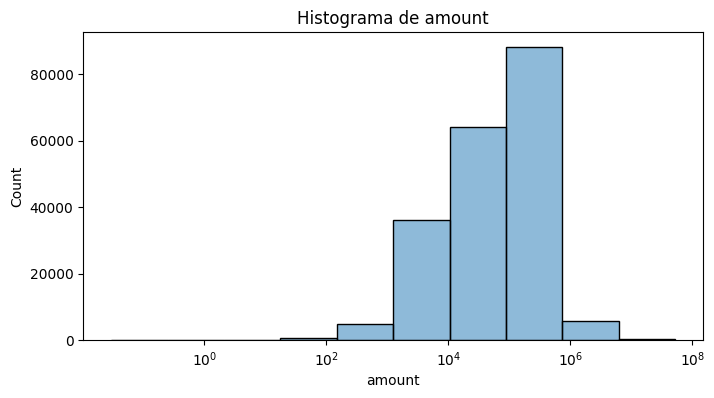

In [38]:
# Histograma
plt.figure(figsize=(8,4))
sns.histplot(df['amount'], bins=10, kde=True,log_scale = True )
plt.title(f"Histograma de {'amount'}")
plt.show()

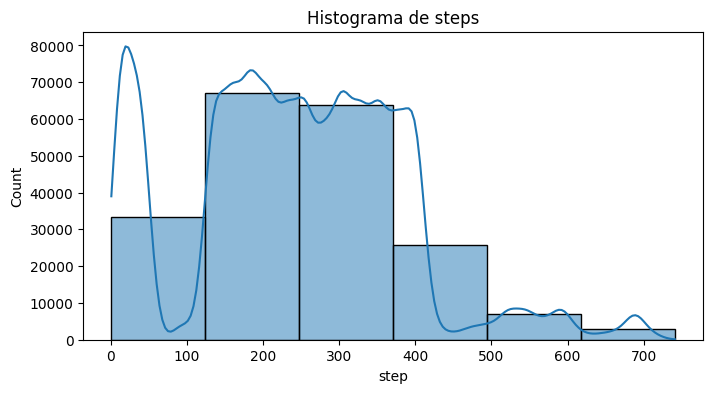

In [42]:
# Histograma
plt.figure(figsize=(8,4))
sns.histplot(df['step'], bins=6, kde=True,)
plt.title(f"Histograma de steps")
plt.show()

Boxplot

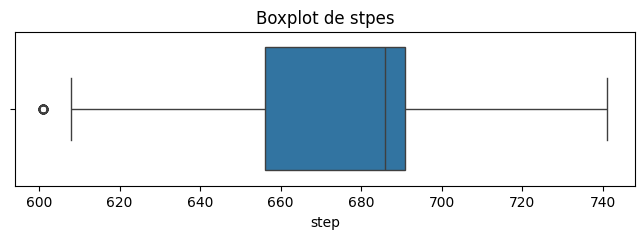

In [39]:
filtro_a = df[df['step'] > 600]
plt.figure(figsize=(8,2))
sns.boxplot(x=filtro_a['step'])
plt.title(f"Boxplot de stpes")
plt.show()

In [27]:
df[df['newbalanceOrig'] == 0.0].count()

step              113508
type              113508
amount            113508
nameOrig          113508
oldbalanceOrg     113508
newbalanceOrig    113508
nameDest          113508
oldbalanceDest    113508
newbalanceDest    113508
isFraud           113508
dtype: int64

In [28]:
df[df['newbalanceDest'] == 0.0].count()

step              76574
type              76574
amount            76574
nameOrig          76574
oldbalanceOrg     76574
newbalanceOrig    76574
nameDest          76574
oldbalanceDest    76574
newbalanceDest    76574
isFraud           76574
dtype: int64

In [29]:
df[df['oldbalanceDest'] == 0.0].count()

step              85165
type              85165
amount            85165
nameOrig          85165
oldbalanceOrg     85165
newbalanceOrig    85165
nameDest          85165
oldbalanceDest    85165
newbalanceDest    85165
isFraud           85165
dtype: int64

In [30]:
df[df['oldbalanceOrg'] == 0.0].count()

step              66179
type              66179
amount            66179
nameOrig          66179
oldbalanceOrg     66179
newbalanceOrig    66179
nameDest          66179
oldbalanceDest    66179
newbalanceDest    66179
isFraud           66179
dtype: int64

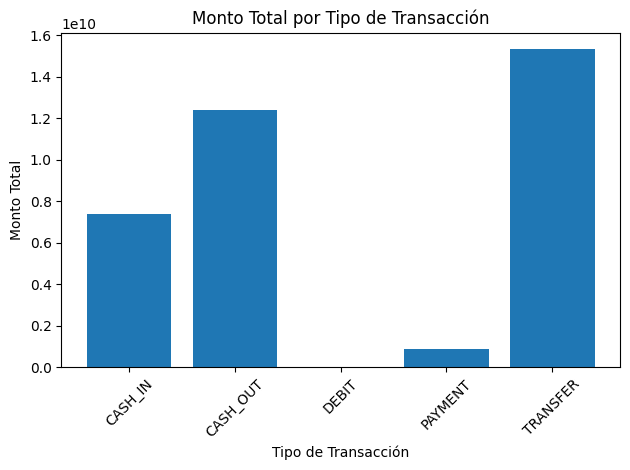

In [46]:
grouped = df.groupby('type')['amount'].sum().reset_index()

# Crear gráfica de barras
plt.figure()
plt.bar(grouped['type'], grouped['amount'])
plt.xlabel('Tipo de Transacción')
plt.ylabel('Monto Total')
plt.title('Monto Total por Tipo de Transacción')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
totales = grouped['amount'].sum()


In [51]:
grouped['porcentaje'] = (grouped['amount'] / totales) * 100
grouped

,type,amount,porcentaje
0,CASH_IN,7404175105.08,20.54
1,CASH_OUT,12403119543.86,34.41
2,DEBIT,6845334.07,0.02
3,PAYMENT,884354487.31,2.45
4,TRANSFER,15349822661.71,42.58


In [53]:
df.groupby(['type', 'type']).size()

type      type    
CASH_IN   CASH_IN     43919
CASH_OUT  CASH_OUT    70571
DEBIT     DEBIT        1317
PAYMENT   PAYMENT     67562
TRANSFER  TRANSFER    16630
dtype: int64

In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0


In [61]:
df['differenceOrig'] = np.abs(df['oldbalanceOrg'] - df['newbalanceOrig'])
df['differenceDest'] = np.abs(df['oldbalanceDest'] - df['newbalanceDest'])

In [69]:
# Columna que verifica si newbalanceDest == oldbalanceDest + amount
df['isOrigconsistent'] = np.isclose(
    df['differenceOrig'],
    df['amount']
) | (df['differenceOrig'] == 0)

df['isDestconsistent'] = np.isclose(
    df['differenceDest'],
    df['amount']
) | (df['differenceDest'] == 0)


In [70]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,differenceOrig,differenceDest,isDestconsistent,isOrigconsistent
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0,0.00,1144615.65,False,True
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0,0.00,457948.30,True,True
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0,153603.00,153603.00,True,True
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0,10865.00,49555.14,True,False
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0,0.00,29648.01,True,True


In [72]:
df['isDestconsistent'].value_counts()

isDestconsistent
True     185074
False     14925
Name: count, dtype: int64

In [73]:
df['isOrigconsistent'].value_counts()

isOrigconsistent
True     152247
False     47752
Name: count, dtype: int64

In [74]:
# Usando suma booleana (True→1, False→0)
count_inconsistentes = ((~df['isDestconsistent']) & (~df['isOrigconsistent'])).sum()
print(f"Número de filas inconsistentes en origen y destino: {count_inconsistentes}")


Número de filas inconsistentes en origen y destino: 3549


In [75]:
print('Destino: ',(14925 / 199999)*100,'%')
print('Origen:',(47752 / 199999)*100,'%')
print('Ambos', (3549 / 199999)*100,'%')


Destino:  7.462537312686564 %
Origen: 23.8761193805969 %
Ambos 1.7745088725443627 %
